---
title: Customer Analysis
keywords: [Customer Analysis, Data Visualization, Matplotlib, Pandas, Opendatasets]
description: In this notebook, I want to observe any trends related to customers.
author: Juma Shafara
date: "2024-07-08"
--- 

---
In this project, I want to look at customer data pulled from github and create some visuals in my jupyter notebook to observe any trends related to customers.

<!-- Newsletter -->
<div style="background-color: #3a6e68; border:1px solid #3a6e68; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>Don't Miss Any Updates!</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p class=pb-1>
Before we continue, we have a humble request, to be among the first to hear about future updates of the course materials, simply enter your email below, follow us on <a href="https://x.com/dataideaorg"><i class="bi bi-twitter-x"></i>
 (formally Twitter)</a>, or subscribe to our <a href="https://www.youtube.com/@dataideaorg"><i class="bi bi-youtube"></i> YouTube channel</a>.
</p>

<iframe src="https://embeds.beehiiv.com/5fc7c425-9c7e-4e08-a514-ad6c22beee74?slim=true" data-test-id="beehiiv-embed" height="52" frameborder="0" scrolling="no" style="margin: 0; border-radius: 0px !important; background-color: transparent; width: 100%;" ></iframe>
</div>


## Downloading the Dataset:

First we download our data sets from github.

In [72]:
!pip install dataidea --upgrade --quiet

In [73]:
import opendatasets as od

# download the dataset
dataset_url = 'https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv'
od.download(dataset_url)

Using downloaded and verified file: ./Marketing_Analysis.csv


## Data Preparation and Cleaning

Get our dataset into a data frame, examine the tables to check for incorrect, inconsistent, or invalid entries. Handle other cleaning steps as necessary.

In [74]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data set of "Marketing Analysis" in data.
data= pd.read_csv("Marketing_Analysis.csv", low_memory=False)

# Printing the data
data.head()


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


## Cleaning the Data

Here we need to fix some of the columns/rows to make the data easier to use.

In [75]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the file in data without first two rows as it is of no use.
data = pd.read_csv("Marketing_Analysis.csv",skiprows = 2)

#print the head of the data frame.
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [76]:
# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)

#Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Printing the Dataset
data.sample(n=5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
7369,28.0,60000,1180,married,yes,no,yes,no,unknown,29,"may, 2017",637 sec,3,-1,0,unknown,no,technician,secondary
31281,44.0,100000,483,single,no,no,no,no,cellular,6,"mar, 2017",3.45 min,2,199,6,success,yes,management,tertiary
736,40.0,20000,-7,married,yes,no,yes,no,unknown,6,"may, 2017",410 sec,2,-1,0,unknown,no,blue-collar,primary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
6297,53.0,60000,6,married,yes,no,yes,no,unknown,27,"may, 2017",233 sec,2,-1,0,unknown,no,self-employed,primary


In [77]:
# Checking the missing values
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [78]:
# Dropping the records with age missing in data dataframe.
data = data[~data.age.isnull()].copy()

# Checking the missing values in the dataset.
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [79]:
# Find the mode of month in data
month_mode = data.month.mode()[0]

# Fill the missing values with mode value of month in data.
data.month.fillna(month_mode, inplace = True)

# Let's see the null values in the month column.
data.month.isnull().sum()

/tmp/ipykernel_39902/3697544734.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.month.fillna(month_mode, inplace = True)


0

In [80]:
#drop the records with response missing in data.
data = data[~data.response.isnull()].copy()
# Calculate the missing values in each column of data frame
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Exploratory Analysis and Visualization

Now we apply some data manipulation steps and explore some of the findings through the use of visuals. Hopefully we can then gain some useful insights from our data. 

## What kind of employment is most common in our data? 

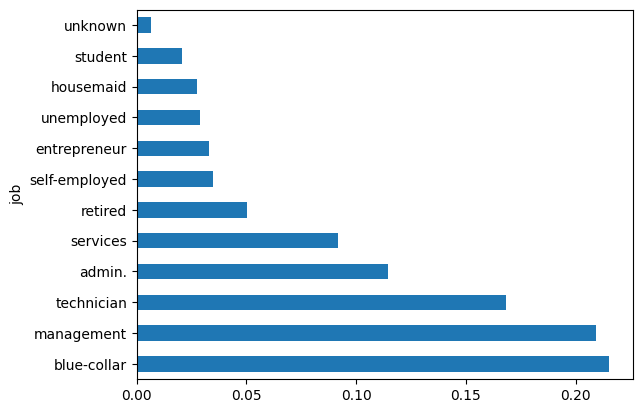

In [81]:
# Let's calculate the percentage of each job status category.
data.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()


## What is the education level? 

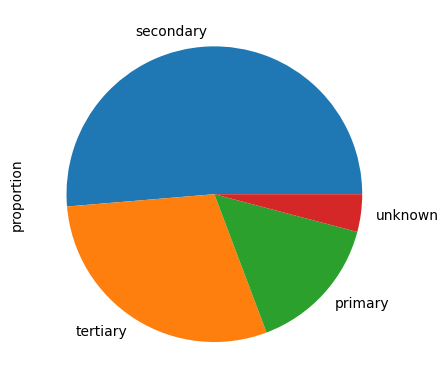

In [82]:
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)

#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [83]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## What are the balances for individuals based on their age? 

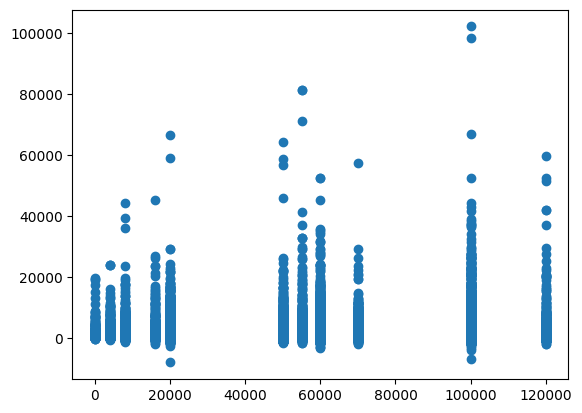

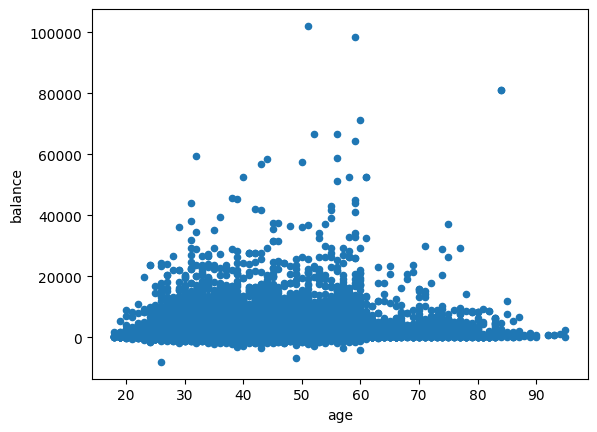

In [84]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.show()

#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.show()

## What is correlating with balance? 

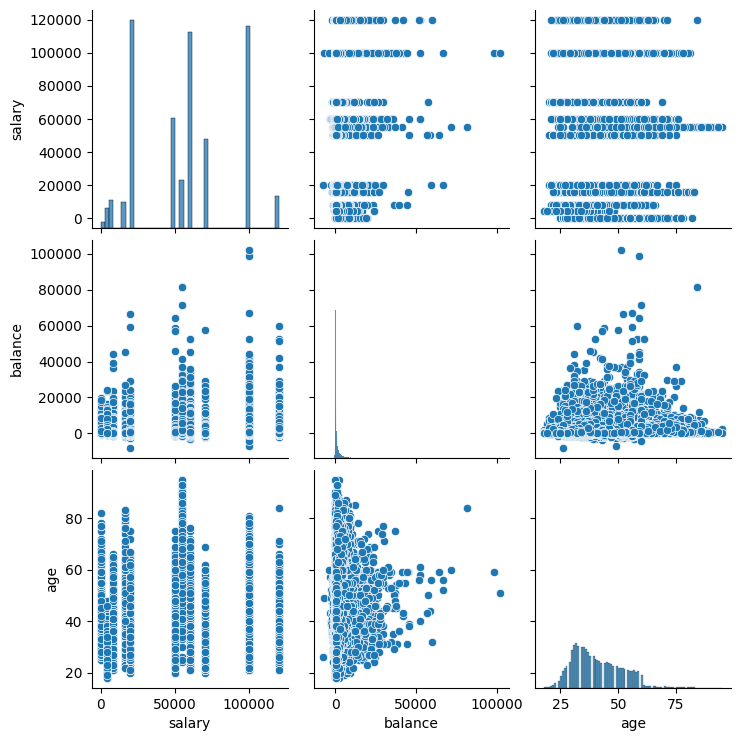

In [85]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = data, vars=['salary','balance','age'])
plt.show()

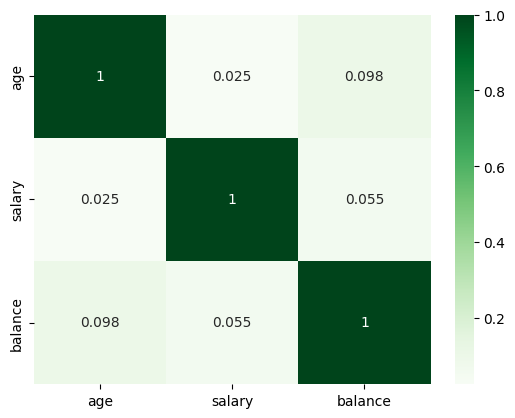

In [86]:
# Creating a matrix using age, salary, balance as rows and columns
data[['age','salary','balance']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Greens')
plt.show()

## What is the salary range and averages for both response types? 

In [87]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

response_rate
0    39876
1     5285
Name: count, dtype: int64

## What marital status has the highest response rate? 

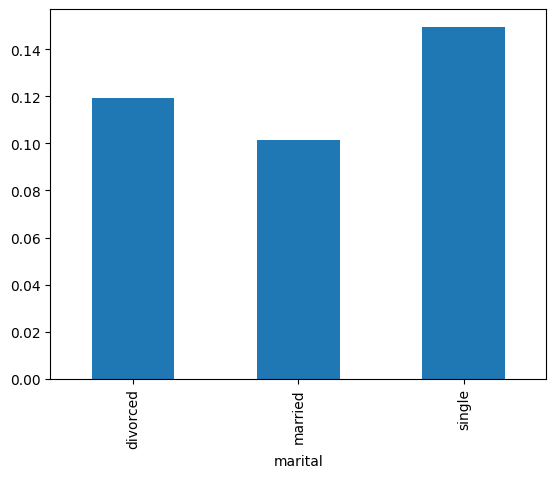

In [88]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

## What combination of education and marital status has the largest response rate? 

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


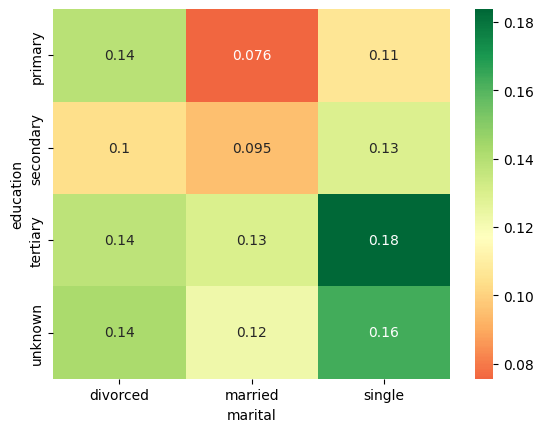

In [89]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
print(result)

#create heat map of to show correlations betwenn education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## What is the average salary for each age group in the data? 

/tmp/ipykernel_39902/506738209.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('agerange')['salary'].mean().plot.bar()


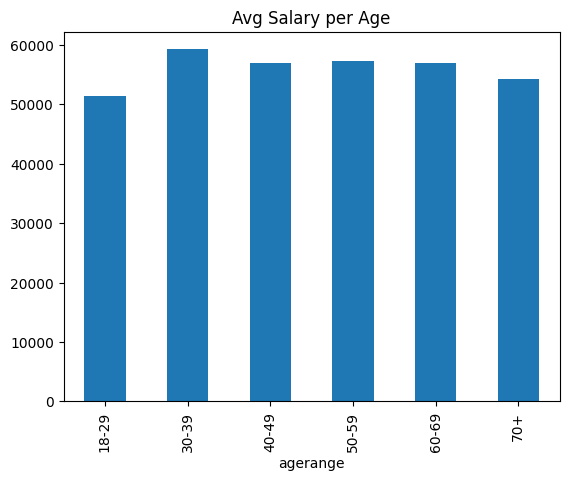

In [90]:
#plot the bar graph of age groups with average salary for that group
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['agerange'] = pd.cut(data.age, bins, labels = labels,include_lowest = True)

#plot the bar graph of average salary per age group
data.groupby('agerange')['salary'].mean().plot.bar()
plt.title('Avg Salary per Age',fontsize = 12)
plt.show()

Let us save and upload our work to Jovian before finishing up.

## Conclusions

What we can say from the visuals above are the following:

1. Approx. 60% of our customers are in the technician/management/blue collar category of work.
2. Half are high school graduates, and less than a third have higher education.
3. For people under 65, the balance is typically between 0-20000. For over 65, we see 0-10000 is the range. 
4. Heatmap supports the age-balance correlation to be stronger than salary-balance.
5. Reponse rate is highest for single highly educated and lowest for married and less educated individuals. 

<h2>What's on your mind? Put it in the comments!</h2>
<script src="https://utteranc.es/client.js"
        repo="dataideaorg/dataidea-science"
        issue-term="pathname"
        theme="github-dark"
        crossorigin="anonymous"
        async>
</script>